In [1]:
import pandas as pd 
import numpy as np
import math
import tensorflow as tf
print(pd.__version__)
import progressbar
import os
from os import listdir

1.2.3


## Print Dependencies



Dependences are fundamental to record the computational environment.

In [2]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,keras,numpy,math,tensorflow,matplotlib,h5py

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.21.0

pandas    : 1.2.3
keras     : 2.4.3
numpy     : 1.19.5
math      : unknown
tensorflow: 2.4.1
matplotlib: 3.3.4
h5py      : 2.10.0

Compiler    : GCC 9.3.0
OS          : Linux
Release     : 5.8.0-44-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

 
Last updated: Tue Mar 16 2021 12:48:36CET



## Load of the data

   You can also load all of them! Writing "all_data"

In [21]:
os.listdir('../data/classifier/')

['inverse-compton.csv',
 '250.csv',
 '100-high-ene.csv',
 'latest.csv',
 '50.csv',
 '100.csv']

In [11]:
n = input('Which file do you want?')

Which file do you want?all_data


In [14]:
if (n != 'all_data'): 
    print(2)

In [26]:
from process import loaddata
if n != 'all_data': 
    class_data = loaddata("../data/classifier/{}.csv".format(n))
if n == 'all_data': 
    files = os.listdir('../data/classifier/')
    for filename in files:
        class_data = loaddata("../data/classifier/{}".format(filename))

In [27]:
np.random.shuffle(class_data)
y = class_data[:,0]
x = class_data[:,1:]

In [28]:
x.shape

(124064, 10)

In [29]:
train_split = 0.75
train_limit = int(len(y)*train_split)
print("Training sample: {0} \nValuation sample: {1}".format(train_limit, len(y)-train_limit))

Training sample: 93048 
Valuation sample: 31016


In [30]:
x_train = x[:train_limit]
x_val = x[train_limit:]

y_train = y[:train_limit]
y_val = y[train_limit:]

## Model Build

In [31]:
from keras.models import Sequential
from keras.layers.core import Dense
import keras.backend as K
from keras import optimizers
from keras import models
from keras import layers

In [57]:
def build_model() :
    model = models.Sequential()
    model.add (layers.Dense (16 , activation = "relu" , input_shape = x.shape))
    model.add(layers.Dropout(0.2))
    model.add (layers.Dense (16, activation = "relu"))
    model.add(layers.Dropout(0.2))
    model.add (layers.Dense (1 , activation = "sigmoid"))
    model.compile(optimizer = "adam" , loss = "binary_crossentropy" , metrics =["accuracy"])
    return model

In [59]:
model = build_model ()
history = model.fit ( x_train, y_train, epochs = 1000, batch_size = 10000 , validation_data = (x_val, y_val) )
model.save("../models/classifier/{}_dropout.csv".format(n))

Epoch 1/1000
10/10 [==============================] - 0s 20ms/step - loss: 0.8908 - accuracy: 0.5029 - val_loss: 0.7553 - val_accuracy: 0.5014
Epoch 2/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.7944 - accuracy: 0.5081 - val_loss: 0.7139 - val_accuracy: 0.5196
Epoch 3/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.7392 - accuracy: 0.5166 - val_loss: 0.6967 - val_accuracy: 0.5549
Epoch 4/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.7142 - accuracy: 0.5130 - val_loss: 0.6922 - val_accuracy: 0.4884
Epoch 5/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.7046 - accuracy: 0.5079 - val_loss: 0.6912 - val_accuracy: 0.4567
Epoch 6/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.7010 - accuracy: 0.5012 - val_loss: 0.6894 - val_accuracy: 0.4779
Epoch 7/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.6984 - accuracy: 0.5043 - val_loss: 0.6870 - val_accuracy: 0.4961
Epoch

Epoch 51/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.2991 - accuracy: 0.8956 - val_loss: 0.2629 - val_accuracy: 0.9158
Epoch 52/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.2931 - accuracy: 0.8983 - val_loss: 0.2594 - val_accuracy: 0.9148
Epoch 53/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.2909 - accuracy: 0.8983 - val_loss: 0.2559 - val_accuracy: 0.9160
Epoch 54/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.2860 - accuracy: 0.9001 - val_loss: 0.2519 - val_accuracy: 0.9168
Epoch 55/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.2844 - accuracy: 0.9004 - val_loss: 0.2491 - val_accuracy: 0.9178
Epoch 56/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.2816 - accuracy: 0.9012 - val_loss: 0.2460 - val_accuracy: 0.9188
Epoch 57/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.2780 - accuracy: 0.9031 - val_loss: 0.2429 - val_accuracy: 0.920

10/10 [==============================] - 0s 8ms/step - loss: 0.2103 - accuracy: 0.9291 - val_loss: 0.1845 - val_accuracy: 0.9416
Epoch 109/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.2106 - accuracy: 0.9293 - val_loss: 0.1840 - val_accuracy: 0.9434
Epoch 110/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.2107 - accuracy: 0.9291 - val_loss: 0.1839 - val_accuracy: 0.9427
Epoch 111/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.2077 - accuracy: 0.9314 - val_loss: 0.1833 - val_accuracy: 0.9432
Epoch 112/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.2110 - accuracy: 0.9288 - val_loss: 0.1835 - val_accuracy: 0.9413
Epoch 113/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.2103 - accuracy: 0.9285 - val_loss: 0.1827 - val_accuracy: 0.9411
Epoch 114/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.2086 - accuracy: 0.9305 - val_loss: 0.1821 - val_accuracy: 0.9432
Epoch 

Epoch 165/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.1933 - accuracy: 0.9356 - val_loss: 0.1684 - val_accuracy: 0.9489
Epoch 166/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.1902 - accuracy: 0.9367 - val_loss: 0.1685 - val_accuracy: 0.9490
Epoch 167/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1895 - accuracy: 0.9370 - val_loss: 0.1683 - val_accuracy: 0.9490
Epoch 168/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1931 - accuracy: 0.9364 - val_loss: 0.1680 - val_accuracy: 0.9489
Epoch 169/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1924 - accuracy: 0.9364 - val_loss: 0.1681 - val_accuracy: 0.9490
Epoch 170/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1908 - accuracy: 0.9366 - val_loss: 0.1677 - val_accuracy: 0.9485
Epoch 171/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1933 - accuracy: 0.9362 - val_loss: 0.1679 - val_accuracy

Epoch 222/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1816 - accuracy: 0.9409 - val_loss: 0.1614 - val_accuracy: 0.9501
Epoch 223/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1821 - accuracy: 0.9403 - val_loss: 0.1610 - val_accuracy: 0.9504
Epoch 224/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.1822 - accuracy: 0.9396 - val_loss: 0.1608 - val_accuracy: 0.9499
Epoch 225/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.1806 - accuracy: 0.9405 - val_loss: 0.1605 - val_accuracy: 0.9504
Epoch 226/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.1833 - accuracy: 0.9401 - val_loss: 0.1606 - val_accuracy: 0.9505
Epoch 227/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.1798 - accuracy: 0.9414 - val_loss: 0.1603 - val_accuracy: 0.9503
Epoch 228/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1795 - accuracy: 0.9421 - val_loss: 0.1607 - val_accuracy:

Epoch 279/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1769 - accuracy: 0.9419 - val_loss: 0.1553 - val_accuracy: 0.9514
Epoch 280/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1738 - accuracy: 0.9429 - val_loss: 0.1549 - val_accuracy: 0.9521
Epoch 281/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1742 - accuracy: 0.9431 - val_loss: 0.1551 - val_accuracy: 0.9519
Epoch 282/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.1741 - accuracy: 0.9433 - val_loss: 0.1545 - val_accuracy: 0.9525
Epoch 283/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1714 - accuracy: 0.9452 - val_loss: 0.1553 - val_accuracy: 0.9516
Epoch 284/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.1738 - accuracy: 0.9434 - val_loss: 0.1550 - val_accuracy: 0.9514
Epoch 285/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.1748 - accuracy: 0.9428 - val_loss: 0.1548 - val_accuracy

Epoch 336/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1712 - accuracy: 0.9440 - val_loss: 0.1510 - val_accuracy: 0.9534
Epoch 337/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.1685 - accuracy: 0.9444 - val_loss: 0.1509 - val_accuracy: 0.9528
Epoch 338/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1692 - accuracy: 0.9449 - val_loss: 0.1512 - val_accuracy: 0.9523
Epoch 339/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1697 - accuracy: 0.9448 - val_loss: 0.1512 - val_accuracy: 0.9526
Epoch 340/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1692 - accuracy: 0.9448 - val_loss: 0.1512 - val_accuracy: 0.9523
Epoch 341/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.1707 - accuracy: 0.9447 - val_loss: 0.1506 - val_accuracy: 0.9532
Epoch 342/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1703 - accuracy: 0.9444 - val_loss: 0.1514 - val_accuracy:

Epoch 393/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1640 - accuracy: 0.9464 - val_loss: 0.1459 - val_accuracy: 0.9539
Epoch 394/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1642 - accuracy: 0.9460 - val_loss: 0.1461 - val_accuracy: 0.9531
Epoch 395/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1651 - accuracy: 0.9456 - val_loss: 0.1456 - val_accuracy: 0.9536
Epoch 396/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1647 - accuracy: 0.9459 - val_loss: 0.1465 - val_accuracy: 0.9535
Epoch 397/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1652 - accuracy: 0.9457 - val_loss: 0.1459 - val_accuracy: 0.9539
Epoch 398/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1639 - accuracy: 0.9469 - val_loss: 0.1452 - val_accuracy: 0.9545
Epoch 399/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1632 - accuracy: 0.9469 - val_loss: 0.1452 - val_accuracy:

Epoch 450/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1609 - accuracy: 0.9475 - val_loss: 0.1433 - val_accuracy: 0.9545
Epoch 451/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1598 - accuracy: 0.9482 - val_loss: 0.1428 - val_accuracy: 0.9547
Epoch 452/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.1600 - accuracy: 0.9480 - val_loss: 0.1437 - val_accuracy: 0.9543
Epoch 453/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1585 - accuracy: 0.9484 - val_loss: 0.1428 - val_accuracy: 0.9550
Epoch 454/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1616 - accuracy: 0.9472 - val_loss: 0.1430 - val_accuracy: 0.9550
Epoch 455/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1617 - accuracy: 0.9474 - val_loss: 0.1427 - val_accuracy: 0.9547
Epoch 456/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1607 - accuracy: 0.9480 - val_loss: 0.1427 - val_accuracy:

Epoch 506/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.1589 - accuracy: 0.9487 - val_loss: 0.1410 - val_accuracy: 0.9554
Epoch 507/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1582 - accuracy: 0.9484 - val_loss: 0.1407 - val_accuracy: 0.9556
Epoch 508/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.1583 - accuracy: 0.9486 - val_loss: 0.1407 - val_accuracy: 0.9554
Epoch 509/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1590 - accuracy: 0.9482 - val_loss: 0.1406 - val_accuracy: 0.9555
Epoch 510/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.1572 - accuracy: 0.9483 - val_loss: 0.1409 - val_accuracy: 0.9557
Epoch 511/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1595 - accuracy: 0.9483 - val_loss: 0.1401 - val_accuracy: 0.9558
Epoch 512/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1593 - accuracy: 0.9480 - val_loss: 0.1410 - val_accuracy

Epoch 563/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.1532 - accuracy: 0.9497 - val_loss: 0.1365 - val_accuracy: 0.9560
Epoch 564/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.1536 - accuracy: 0.9494 - val_loss: 0.1359 - val_accuracy: 0.9562
Epoch 565/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1532 - accuracy: 0.9501 - val_loss: 0.1359 - val_accuracy: 0.9562
Epoch 566/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1528 - accuracy: 0.9498 - val_loss: 0.1358 - val_accuracy: 0.9558
Epoch 567/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1547 - accuracy: 0.9490 - val_loss: 0.1351 - val_accuracy: 0.9566
Epoch 568/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.1560 - accuracy: 0.9488 - val_loss: 0.1360 - val_accuracy: 0.9563
Epoch 569/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1555 - accuracy: 0.9488 - val_loss: 0.1360 - val_accuracy

Epoch 620/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1512 - accuracy: 0.9498 - val_loss: 0.1349 - val_accuracy: 0.9562
Epoch 621/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1534 - accuracy: 0.9494 - val_loss: 0.1336 - val_accuracy: 0.9565
Epoch 622/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1519 - accuracy: 0.9498 - val_loss: 0.1341 - val_accuracy: 0.9566
Epoch 623/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.1511 - accuracy: 0.9504 - val_loss: 0.1343 - val_accuracy: 0.9565
Epoch 624/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1527 - accuracy: 0.9500 - val_loss: 0.1333 - val_accuracy: 0.9567
Epoch 625/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1517 - accuracy: 0.9501 - val_loss: 0.1340 - val_accuracy: 0.9566
Epoch 626/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1497 - accuracy: 0.9511 - val_loss: 0.1344 - val_accuracy:

Epoch 677/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1516 - accuracy: 0.9503 - val_loss: 0.1330 - val_accuracy: 0.9566
Epoch 678/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1473 - accuracy: 0.9517 - val_loss: 0.1323 - val_accuracy: 0.9566
Epoch 679/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.1502 - accuracy: 0.9506 - val_loss: 0.1324 - val_accuracy: 0.9567
Epoch 680/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.1515 - accuracy: 0.9499 - val_loss: 0.1322 - val_accuracy: 0.9565
Epoch 681/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1496 - accuracy: 0.9509 - val_loss: 0.1324 - val_accuracy: 0.9563
Epoch 682/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1498 - accuracy: 0.9510 - val_loss: 0.1325 - val_accuracy: 0.9564
Epoch 683/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.1514 - accuracy: 0.9504 - val_loss: 0.1324 - val_accuracy:

Epoch 734/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1492 - accuracy: 0.9506 - val_loss: 0.1309 - val_accuracy: 0.9571
Epoch 735/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.1463 - accuracy: 0.9520 - val_loss: 0.1311 - val_accuracy: 0.9571
Epoch 736/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1480 - accuracy: 0.9516 - val_loss: 0.1313 - val_accuracy: 0.9571
Epoch 737/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1478 - accuracy: 0.9516 - val_loss: 0.1307 - val_accuracy: 0.9568
Epoch 738/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.1472 - accuracy: 0.9516 - val_loss: 0.1305 - val_accuracy: 0.9571
Epoch 739/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1484 - accuracy: 0.9513 - val_loss: 0.1307 - val_accuracy: 0.9572
Epoch 740/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1476 - accuracy: 0.9516 - val_loss: 0.1312 - val_accuracy:

10/10 [==============================] - 0s 10ms/step - loss: 0.1468 - accuracy: 0.9521 - val_loss: 0.1297 - val_accuracy: 0.9567
Epoch 791/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.1458 - accuracy: 0.9518 - val_loss: 0.1288 - val_accuracy: 0.9579
Epoch 792/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1470 - accuracy: 0.9514 - val_loss: 0.1304 - val_accuracy: 0.9576
Epoch 793/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.1490 - accuracy: 0.9512 - val_loss: 0.1301 - val_accuracy: 0.9572
Epoch 794/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1470 - accuracy: 0.9516 - val_loss: 0.1294 - val_accuracy: 0.9571
Epoch 795/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1456 - accuracy: 0.9521 - val_loss: 0.1304 - val_accuracy: 0.9569
Epoch 796/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.1460 - accuracy: 0.9520 - val_loss: 0.1303 - val_accuracy: 0.9563
Epoch 

Epoch 847/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1459 - accuracy: 0.9526 - val_loss: 0.1280 - val_accuracy: 0.9578
Epoch 848/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1449 - accuracy: 0.9527 - val_loss: 0.1277 - val_accuracy: 0.9577
Epoch 849/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1450 - accuracy: 0.9521 - val_loss: 0.1276 - val_accuracy: 0.9579
Epoch 850/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.1452 - accuracy: 0.9526 - val_loss: 0.1279 - val_accuracy: 0.9573
Epoch 851/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1433 - accuracy: 0.9527 - val_loss: 0.1285 - val_accuracy: 0.9570
Epoch 852/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1461 - accuracy: 0.9520 - val_loss: 0.1282 - val_accuracy: 0.9572
Epoch 853/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.1453 - accuracy: 0.9516 - val_loss: 0.1273 - val_accuracy:

Epoch 904/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1428 - accuracy: 0.9530 - val_loss: 0.1264 - val_accuracy: 0.9581
Epoch 905/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.1444 - accuracy: 0.9525 - val_loss: 0.1264 - val_accuracy: 0.9582
Epoch 906/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1433 - accuracy: 0.9522 - val_loss: 0.1263 - val_accuracy: 0.9579
Epoch 907/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1423 - accuracy: 0.9536 - val_loss: 0.1263 - val_accuracy: 0.9579
Epoch 908/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1439 - accuracy: 0.9524 - val_loss: 0.1258 - val_accuracy: 0.9578
Epoch 909/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.1431 - accuracy: 0.9525 - val_loss: 0.1268 - val_accuracy: 0.9574
Epoch 910/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1463 - accuracy: 0.9516 - val_loss: 0.1266 - val_accuracy

Epoch 961/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1397 - accuracy: 0.9537 - val_loss: 0.1257 - val_accuracy: 0.9582
Epoch 962/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1425 - accuracy: 0.9526 - val_loss: 0.1259 - val_accuracy: 0.9575
Epoch 963/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1424 - accuracy: 0.9531 - val_loss: 0.1254 - val_accuracy: 0.9581
Epoch 964/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.1423 - accuracy: 0.9536 - val_loss: 0.1256 - val_accuracy: 0.9576
Epoch 965/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.1420 - accuracy: 0.9535 - val_loss: 0.1254 - val_accuracy: 0.9580
Epoch 966/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.1412 - accuracy: 0.9538 - val_loss: 0.1249 - val_accuracy: 0.9581
Epoch 967/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1419 - accuracy: 0.9533 - val_loss: 0.1246 - val_accuracy

## Adding Dropout

Dropout is one of the most effective and most commonly used regularization techniques for neural networks, developed by Geoff Hinton and his students at the University of Toronto. Dropout, applied to a layer, consists of randomly dropping out (setting to zero) a number of output features of the layer during training. Let’s say a
given layer would normally return a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training. After applying dropout, this vector will have a few zero entries distributed at random: for example, [0, 0.5, 1.3, 0, 1.1]. The dropout rate is the fraction of the features that are zeroed out; it’s usually set between 0.2 and 0.5. At test time, no units are dropped out; instead, the layer’s output values are scaled down by a factor equal to the dropout rate, to balance for the fact that more units are active than at training time.

##### [From Deep Learning with Python, Chollet]

<ipython-input-60-371c4d5f3f4d>:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


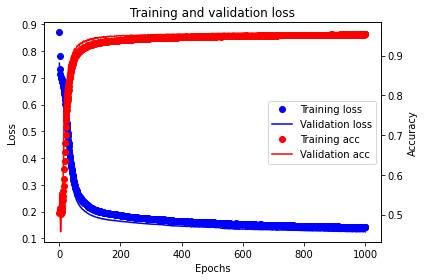

In [60]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


epochs = range(1, len(loss) + 1)
fig, ax1 = plt.subplots()

l1 = ax1.plot(epochs, loss, 'bo', label='Training loss')
vl1 = ax1.plot(epochs, val_loss, 'b', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')

ax2 = ax1.twinx()
ac2= ax2.plot(epochs, accuracy, 'o', c="red", label='Training acc')
vac2= ax2.plot(epochs, val_accuracy, 'r', label='Validation acc')
ax2.set_ylabel('Accuracy')

lns = l1 + vl1 + ac2 + vac2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc="center right")
fig.tight_layout()
fig.savefig("acc+loss_drop.pdf")
fig.show()

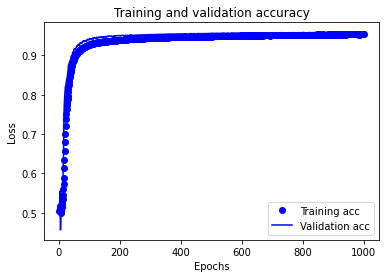

In [61]:
plt.clf()   # clear figure

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [62]:
def build_model() :
    model = models.Sequential()
    model.add (layers.Dense (16 , activation = "relu" , input_shape = x.shape))
    model.add (layers.Dense (16, activation = "relu"))
    model.add (layers.Dense (1 , activation = "sigmoid"))
    model.compile(optimizer = "adam" , loss = "binary_crossentropy" , metrics =["accuracy"])
    return model

In [54]:
model = build_model ()
history = model.fit ( x_train, y_train, epochs = 1000, batch_size = 10000 , validation_data = (x_val, y_val) )
model.save("../models/classifier/{}_nodropout.csv".format(n))

Epoch 1/1000
10/10 [==============================] - 0s 14ms/step - loss: 0.8490 - accuracy: 0.5000 - val_loss: 0.7586 - val_accuracy: 0.5003
Epoch 2/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.7381 - accuracy: 0.4995 - val_loss: 0.7009 - val_accuracy: 0.5034
Epoch 3/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.6951 - accuracy: 0.5055 - val_loss: 0.6786 - val_accuracy: 0.5350
Epoch 4/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.6741 - accuracy: 0.5652 - val_loss: 0.6642 - val_accuracy: 0.6754
Epoch 5/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.6621 - accuracy: 0.7101 - val_loss: 0.6565 - val_accuracy: 0.7052
Epoch 6/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.6554 - accuracy: 0.7086 - val_loss: 0.6518 - val_accuracy: 0.7247
Epoch 7/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.6507 - accuracy: 0.7283 - val_loss: 0.6459 - val_accuracy: 0.7476
Epoch

10/10 [==============================] - 0s 8ms/step - loss: 0.3021 - accuracy: 0.8910 - val_loss: 0.2993 - val_accuracy: 0.8922
Epoch 52/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.2985 - accuracy: 0.8933 - val_loss: 0.2957 - val_accuracy: 0.8931
Epoch 53/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.2949 - accuracy: 0.8929 - val_loss: 0.2926 - val_accuracy: 0.8939
Epoch 54/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.2909 - accuracy: 0.8967 - val_loss: 0.2894 - val_accuracy: 0.9000
Epoch 55/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.2888 - accuracy: 0.8971 - val_loss: 0.2861 - val_accuracy: 0.9008
Epoch 56/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.2855 - accuracy: 0.8982 - val_loss: 0.2833 - val_accuracy: 0.9030
Epoch 57/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.2822 - accuracy: 0.8995 - val_loss: 0.2801 - val_accuracy: 0.8953
Epoch 58/1000

10/10 [==============================] - 0s 6ms/step - loss: 0.2094 - accuracy: 0.9302 - val_loss: 0.2065 - val_accuracy: 0.9325
Epoch 109/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.2076 - accuracy: 0.9293 - val_loss: 0.2056 - val_accuracy: 0.9316
Epoch 110/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.2057 - accuracy: 0.9300 - val_loss: 0.2051 - val_accuracy: 0.9311
Epoch 111/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.2066 - accuracy: 0.9296 - val_loss: 0.2044 - val_accuracy: 0.9313
Epoch 112/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.2060 - accuracy: 0.9292 - val_loss: 0.2042 - val_accuracy: 0.9327
Epoch 113/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.2066 - accuracy: 0.9308 - val_loss: 0.2032 - val_accuracy: 0.9313
Epoch 114/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.2047 - accuracy: 0.9300 - val_loss: 0.2030 - val_accuracy: 0.9299
Epoch 1

Epoch 165/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1844 - accuracy: 0.9397 - val_loss: 0.1835 - val_accuracy: 0.9413
Epoch 166/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1850 - accuracy: 0.9395 - val_loss: 0.1840 - val_accuracy: 0.9398
Epoch 167/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1852 - accuracy: 0.9387 - val_loss: 0.1835 - val_accuracy: 0.9423
Epoch 168/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1846 - accuracy: 0.9401 - val_loss: 0.1828 - val_accuracy: 0.9416
Epoch 169/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1853 - accuracy: 0.9392 - val_loss: 0.1833 - val_accuracy: 0.9419
Epoch 170/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.1865 - accuracy: 0.9389 - val_loss: 0.1826 - val_accuracy: 0.9410
Epoch 171/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1861 - accuracy: 0.9381 - val_loss: 0.1825 - val_accuracy:

Epoch 222/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1735 - accuracy: 0.9444 - val_loss: 0.1736 - val_accuracy: 0.9459
Epoch 223/1000
10/10 [==============================] - 0s 12ms/step - loss: 0.1768 - accuracy: 0.9432 - val_loss: 0.1728 - val_accuracy: 0.9454
Epoch 224/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1748 - accuracy: 0.9436 - val_loss: 0.1729 - val_accuracy: 0.9450
Epoch 225/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1749 - accuracy: 0.9433 - val_loss: 0.1729 - val_accuracy: 0.9466
Epoch 226/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1747 - accuracy: 0.9433 - val_loss: 0.1724 - val_accuracy: 0.9457
Epoch 227/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1758 - accuracy: 0.9428 - val_loss: 0.1724 - val_accuracy: 0.9457
Epoch 228/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1740 - accuracy: 0.9439 - val_loss: 0.1729 - val_accuracy

Epoch 279/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1714 - accuracy: 0.9450 - val_loss: 0.1664 - val_accuracy: 0.9463
Epoch 280/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1687 - accuracy: 0.9445 - val_loss: 0.1663 - val_accuracy: 0.9465
Epoch 281/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1688 - accuracy: 0.9450 - val_loss: 0.1667 - val_accuracy: 0.9466
Epoch 282/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1716 - accuracy: 0.9442 - val_loss: 0.1660 - val_accuracy: 0.9466
Epoch 283/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1675 - accuracy: 0.9456 - val_loss: 0.1664 - val_accuracy: 0.9466
Epoch 284/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1676 - accuracy: 0.9457 - val_loss: 0.1669 - val_accuracy: 0.9471
Epoch 285/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1691 - accuracy: 0.9453 - val_loss: 0.1660 - val_accuracy:

10/10 [==============================] - 0s 5ms/step - loss: 0.1666 - accuracy: 0.9457 - val_loss: 0.1626 - val_accuracy: 0.9473
Epoch 336/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1643 - accuracy: 0.9459 - val_loss: 0.1627 - val_accuracy: 0.9482
Epoch 337/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.1651 - accuracy: 0.9466 - val_loss: 0.1625 - val_accuracy: 0.9473
Epoch 338/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1650 - accuracy: 0.9461 - val_loss: 0.1624 - val_accuracy: 0.9473
Epoch 339/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1639 - accuracy: 0.9467 - val_loss: 0.1625 - val_accuracy: 0.9480
Epoch 340/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1633 - accuracy: 0.9465 - val_loss: 0.1625 - val_accuracy: 0.9478
Epoch 341/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1642 - accuracy: 0.9467 - val_loss: 0.1622 - val_accuracy: 0.9481
Epoch 3

Epoch 392/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1614 - accuracy: 0.9478 - val_loss: 0.1604 - val_accuracy: 0.9485
Epoch 393/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.1626 - accuracy: 0.9470 - val_loss: 0.1603 - val_accuracy: 0.9486
Epoch 394/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1596 - accuracy: 0.9482 - val_loss: 0.1601 - val_accuracy: 0.9484
Epoch 395/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.1645 - accuracy: 0.9462 - val_loss: 0.1600 - val_accuracy: 0.9481
Epoch 396/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1636 - accuracy: 0.9465 - val_loss: 0.1611 - val_accuracy: 0.9481
Epoch 397/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1641 - accuracy: 0.9467 - val_loss: 0.1607 - val_accuracy: 0.9483
Epoch 398/1000
10/10 [==============================] - 0s 11ms/step - loss: 0.1622 - accuracy: 0.9473 - val_loss: 0.1602 - val_accuracy

Epoch 449/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1612 - accuracy: 0.9471 - val_loss: 0.1590 - val_accuracy: 0.9486
Epoch 450/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.1616 - accuracy: 0.9473 - val_loss: 0.1589 - val_accuracy: 0.9490
Epoch 451/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1603 - accuracy: 0.9478 - val_loss: 0.1588 - val_accuracy: 0.9488
Epoch 452/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1621 - accuracy: 0.9471 - val_loss: 0.1593 - val_accuracy: 0.9487
Epoch 453/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.1628 - accuracy: 0.9471 - val_loss: 0.1591 - val_accuracy: 0.9489
Epoch 454/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1622 - accuracy: 0.9470 - val_loss: 0.1595 - val_accuracy: 0.9483
Epoch 455/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.1620 - accuracy: 0.9473 - val_loss: 0.1589 - val_accuracy:

Epoch 506/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1616 - accuracy: 0.9475 - val_loss: 0.1588 - val_accuracy: 0.9489
Epoch 507/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1598 - accuracy: 0.9479 - val_loss: 0.1585 - val_accuracy: 0.9495
Epoch 508/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1623 - accuracy: 0.9468 - val_loss: 0.1585 - val_accuracy: 0.9492
Epoch 509/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1605 - accuracy: 0.9479 - val_loss: 0.1583 - val_accuracy: 0.9495
Epoch 510/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1593 - accuracy: 0.9484 - val_loss: 0.1586 - val_accuracy: 0.9489
Epoch 511/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1616 - accuracy: 0.9475 - val_loss: 0.1580 - val_accuracy: 0.9496
Epoch 512/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1631 - accuracy: 0.9470 - val_loss: 0.1583 - val_accuracy:

Epoch 563/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1607 - accuracy: 0.9481 - val_loss: 0.1577 - val_accuracy: 0.9498
Epoch 564/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1613 - accuracy: 0.9479 - val_loss: 0.1581 - val_accuracy: 0.9490
Epoch 565/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1619 - accuracy: 0.9476 - val_loss: 0.1577 - val_accuracy: 0.9496
Epoch 566/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1625 - accuracy: 0.9473 - val_loss: 0.1581 - val_accuracy: 0.9497
Epoch 567/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1594 - accuracy: 0.9485 - val_loss: 0.1581 - val_accuracy: 0.9493
Epoch 568/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1611 - accuracy: 0.9482 - val_loss: 0.1576 - val_accuracy: 0.9493
Epoch 569/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1599 - accuracy: 0.9482 - val_loss: 0.1578 - val_accuracy:

Epoch 620/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1594 - accuracy: 0.9485 - val_loss: 0.1576 - val_accuracy: 0.9496
Epoch 621/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1617 - accuracy: 0.9479 - val_loss: 0.1573 - val_accuracy: 0.9500
Epoch 622/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1608 - accuracy: 0.9477 - val_loss: 0.1577 - val_accuracy: 0.9494
Epoch 623/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1607 - accuracy: 0.9483 - val_loss: 0.1575 - val_accuracy: 0.9495
Epoch 624/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1597 - accuracy: 0.9484 - val_loss: 0.1573 - val_accuracy: 0.9496
Epoch 625/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1591 - accuracy: 0.9485 - val_loss: 0.1573 - val_accuracy: 0.9495
Epoch 626/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1603 - accuracy: 0.9485 - val_loss: 0.1577 - val_accuracy:

Epoch 677/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1582 - accuracy: 0.9494 - val_loss: 0.1569 - val_accuracy: 0.9503
Epoch 678/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1608 - accuracy: 0.9481 - val_loss: 0.1572 - val_accuracy: 0.9503
Epoch 679/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1600 - accuracy: 0.9490 - val_loss: 0.1568 - val_accuracy: 0.9500
Epoch 680/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1598 - accuracy: 0.9486 - val_loss: 0.1566 - val_accuracy: 0.9503
Epoch 681/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1587 - accuracy: 0.9492 - val_loss: 0.1573 - val_accuracy: 0.9499
Epoch 682/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1589 - accuracy: 0.9485 - val_loss: 0.1567 - val_accuracy: 0.9504
Epoch 683/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1574 - accuracy: 0.9491 - val_loss: 0.1566 - val_accuracy:

Epoch 734/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1616 - accuracy: 0.9478 - val_loss: 0.1565 - val_accuracy: 0.9504
Epoch 735/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1613 - accuracy: 0.9482 - val_loss: 0.1571 - val_accuracy: 0.9497
Epoch 736/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1606 - accuracy: 0.9488 - val_loss: 0.1573 - val_accuracy: 0.9501
Epoch 737/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1585 - accuracy: 0.9495 - val_loss: 0.1561 - val_accuracy: 0.9505
Epoch 738/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1590 - accuracy: 0.9492 - val_loss: 0.1565 - val_accuracy: 0.9502
Epoch 739/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1594 - accuracy: 0.9487 - val_loss: 0.1562 - val_accuracy: 0.9504
Epoch 740/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.1593 - accuracy: 0.9488 - val_loss: 0.1567 - val_accuracy:

Epoch 791/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1565 - accuracy: 0.9501 - val_loss: 0.1567 - val_accuracy: 0.9499
Epoch 792/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1600 - accuracy: 0.9485 - val_loss: 0.1559 - val_accuracy: 0.9509
Epoch 793/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1573 - accuracy: 0.9500 - val_loss: 0.1559 - val_accuracy: 0.9507
Epoch 794/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1566 - accuracy: 0.9498 - val_loss: 0.1557 - val_accuracy: 0.9506
Epoch 795/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1598 - accuracy: 0.9484 - val_loss: 0.1561 - val_accuracy: 0.9506
Epoch 796/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1584 - accuracy: 0.9491 - val_loss: 0.1559 - val_accuracy: 0.9507
Epoch 797/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1591 - accuracy: 0.9491 - val_loss: 0.1558 - val_accuracy:

Epoch 848/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1575 - accuracy: 0.9497 - val_loss: 0.1561 - val_accuracy: 0.9503
Epoch 849/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1598 - accuracy: 0.9487 - val_loss: 0.1552 - val_accuracy: 0.9509
Epoch 850/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1568 - accuracy: 0.9503 - val_loss: 0.1557 - val_accuracy: 0.9506
Epoch 851/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1578 - accuracy: 0.9491 - val_loss: 0.1556 - val_accuracy: 0.9505
Epoch 852/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1587 - accuracy: 0.9490 - val_loss: 0.1552 - val_accuracy: 0.9510
Epoch 853/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1580 - accuracy: 0.9497 - val_loss: 0.1550 - val_accuracy: 0.9508
Epoch 854/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1577 - accuracy: 0.9497 - val_loss: 0.1556 - val_accuracy:

Epoch 905/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1561 - accuracy: 0.9499 - val_loss: 0.1545 - val_accuracy: 0.9507
Epoch 906/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1562 - accuracy: 0.9503 - val_loss: 0.1545 - val_accuracy: 0.9507
Epoch 907/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1562 - accuracy: 0.9507 - val_loss: 0.1545 - val_accuracy: 0.9510
Epoch 908/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1556 - accuracy: 0.9502 - val_loss: 0.1545 - val_accuracy: 0.9513
Epoch 909/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1594 - accuracy: 0.9489 - val_loss: 0.1549 - val_accuracy: 0.9512
Epoch 910/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1562 - accuracy: 0.9504 - val_loss: 0.1544 - val_accuracy: 0.9513
Epoch 911/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1598 - accuracy: 0.9492 - val_loss: 0.1544 - val_accuracy:

Epoch 962/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1568 - accuracy: 0.9501 - val_loss: 0.1539 - val_accuracy: 0.9516
Epoch 963/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1564 - accuracy: 0.9503 - val_loss: 0.1539 - val_accuracy: 0.9514
Epoch 964/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1568 - accuracy: 0.9504 - val_loss: 0.1538 - val_accuracy: 0.9515
Epoch 965/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1582 - accuracy: 0.9492 - val_loss: 0.1537 - val_accuracy: 0.9515
Epoch 966/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1556 - accuracy: 0.9506 - val_loss: 0.1538 - val_accuracy: 0.9516
Epoch 967/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1556 - accuracy: 0.9507 - val_loss: 0.1538 - val_accuracy: 0.9516
Epoch 968/1000
10/10 [==============================] - 0s 5ms/step - loss: 0.1550 - accuracy: 0.9510 - val_loss: 0.1537 - val_accuracy:

<ipython-input-55-371c4d5f3f4d>:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


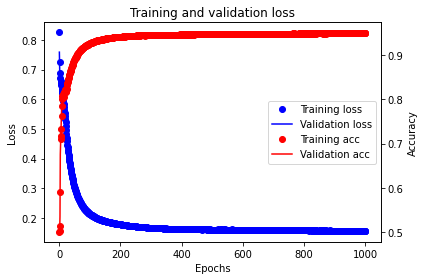

In [55]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


epochs = range(1, len(loss) + 1)
fig, ax1 = plt.subplots()

l1 = ax1.plot(epochs, loss, 'bo', label='Training loss')
vl1 = ax1.plot(epochs, val_loss, 'b', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')

ax2 = ax1.twinx()
ac2= ax2.plot(epochs, accuracy, 'o', c="red", label='Training acc')
vac2= ax2.plot(epochs, val_accuracy, 'r', label='Validation acc')
ax2.set_ylabel('Accuracy')

lns = l1 + vl1 + ac2 + vac2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc="center right")
fig.tight_layout()
fig.savefig("acc+loss_drop.pdf")
fig.show()

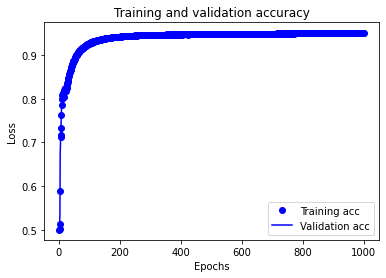

In [56]:
plt.clf()   # clear figure

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Performance summary and dropout vs no dropout

In [63]:
class_dropout = keras.models.load_model('../models/classifier/{}_dropout.h5'.format(n))
class_nodropout = keras.models.load_model('../models/classifier/{}_nodropout.h5'.format(n))

NameError: name 'keras' is not defined

In [ ]:
class_dropout.fit(x_test, y_test)
class_nodropout.fit(x_test, y_test)

In [ ]:
class_dropout.fit(x_train, y_train)
class_nodropout.fit(x_train, y_train)

## Probability density distribution